# An Analysis of the IMDB Top 50 Best films from 2015 - 2019 (A 2 Part Jupyter Notebook)
## PART II - This Jupyter notebook contains:
##### * Cleaning, Processing of Data using Pandas dataframes, regex
##### * Dealing with multiple categorical variables such as genre, handled by get_dummies() and inner joined into our dataframe
##### * Some key insights/analysis of the genres in relation to movie budgets, and gross earnings. Visualized using matplotlib
##### * Correlation observation using corr() and seaborn heatmap visualization
##### * Data Exported to csv, which was further analyzed and presented on Tableau Desktop

## - Hasan Zafar

### We can further clean and continue our analysis here using pandas
##### Read data again into DF

In [93]:
dataimdb = pd.read_csv('top50last5yrs_imdb.csv')

##### Since the budget and gross columns are not in the same format so will convert both into '$M'

In [94]:
#replacing remaining $ signs and commas
budget_tmp = dataimdb['budget'].astype(str).str.replace('[$,]', '')
budget_tmp1 = budget_tmp.astype(str).str.replace('EUR', '')
budget_tmp2 = budget_tmp1.astype(str).str.replace('KRW', '')
budget_tmp3 = budget_tmp2.astype(str).str.replace('JPY', '')
budget_tmp4 = budget_tmp3.astype(str).str.replace('GBP', '')

In [95]:
#convert into millions
millions = pd.to_numeric(budget_tmp4, errors='coerce')/1e6

In [96]:
#store millions into df
dataimdb['Budget $(mil)'] = millions.round(2)
dataimdb.head()

,title,date,runtime,genre,rating,description,director,stars,votes,gross,budget,urls,Budget $(mil)
0,Gisaengchung,2019,132,"['Comedy', ' Drama', ' Thriller']",8.6,Greed and class discrimination threaten th...,Bong Joon Ho,"['Kang-ho Song', 'Sun-kyun Lee', 'Yeo-jeong Jo...",378133,$53.37M,11400000,https://www.imdb.com/title/tt6751668/,11.4
1,Joker,2019,122,"['Crime', ' Drama', ' Thriller']",8.5,"In Gotham City, mentally troubled comedian...",Todd Phillips,"['Joaquin Phoenix', 'Robert De Niro', 'Zazie B...",763252,$335.45M,55000000,https://www.imdb.com/title/tt7286456/,55.0
2,Avengers: Endgame,2019,181,"['Action', ' Adventure', ' Drama']",8.4,After the devastating events of Avengers: ...,"Directors:Anthony Russo, Joe Russo","['Robert Downey Jr.', 'Chris Evans', 'Mark Ruf...",702524,$858.37M,356000000,https://www.imdb.com/title/tt4154796/,356.0
3,1917,2019,119,"['Drama', ' War']",8.3,"April 6th, 1917. As a regiment assembles t...",Sam Mendes,"['Dean-Charles Chapman', 'George MacKay', 'Dan...",286988,$159.23M,95000000,https://www.imdb.com/title/tt8579674/,95.0
4,Ford v Ferrari,2019,152,"['Action', ' Biography', ' Drama']",8.1,American car designer Carroll Shelby and d...,James Mangold,"['Matt Damon', 'Christian Bale', 'Jon Bernthal...",202648,$117.62M,97600000,https://www.imdb.com/title/tt1950186/,97.6


##### Here, I have cleaned the genre and stars lists. Only commas are left so genres can be split using ',' later

In [101]:
genre_tmp = dataimdb['genre'].str.replace(r"[\"\']","")
genre_tmp1 = genre_tmp.str.replace('[',"")
genre_tmp2 = genre_tmp1.str.replace(']',"")
genre_tmp3 = genre_tmp2.str.replace(' ',"")

stars_tmp = dataimdb['stars'].str.replace(r"[\"\']","")
stars_tmp1 = stars_tmp.str.replace('[',"")
stars_tmp2 = stars_tmp1.str.replace(']',"")

dataimdb['genre']=genre_tmp3
dataimdb['stars']=stars_tmp2
#dataimdb.head()

##### Bringing Gross Amount in the same format as Budget '$M'

In [98]:
#similarly, will convert gross millions into same numeric format from string
gross_tmp = dataimdb['gross'].astype(str).str.replace('$', '')
gross_tmp1 = gross_tmp.astype(str).str.replace('M', '')
grossmill = pd.to_numeric(gross_tmp1, errors ='coerce')

In [99]:
#store gross into df
dataimdb['Gross $(mil)'] = grossmill.round(2)
dataimdb.tail()

,title,date,runtime,genre,rating,description,director,stars,votes,gross,budget,urls,Budget $(mil),Gross $(mil)
380,It Follows,2014,100,"Horror,Mystery,Thriller",6.8,A young woman is followed by an unknown su...,David Robert Mitchell,"Maika Monroe, Keir Gilchrist, Olivia Luccardi,...",197780,$14.67M,1000000,https://www.imdb.com/title/tt3235888/,1.00,14.67
381,Ich seh ich seh,2014,99,"Horror,Mystery,Thriller",6.7,Twin boys move to a new home with their mo...,"Directors:Severin Fiala, Veronika Franz","Lukas Schwarz, Elias Schwarz, Susanne Wuest, H...",39874,$1.17M,1178196,https://www.imdb.com/title/tt3086442/,1.18,1.17
382,Boulevard,2014,88,Drama,5.8,A devoted husband in a marriage of conveni...,Dito Montiel,"Robin Williams, Roberto Aguire, Kathy Baker, B...",7822,$0.12M,126150,https://www.imdb.com/title/tt2624412/,0.13,0.12
383,Lost River,2014,95,"Drama,Fantasy,Mystery",5.8,A single mother is swept into a dark under...,Ryan Gosling,"Christina Hendricks, Iain De Caestecker, Matt ...",16439,$0.04M,2000000,https://www.imdb.com/title/tt2366608/,2.00,0.04
384,The Falling,2014,102,"Drama,Mystery,Thriller",5.4,It's 1969 at a strict English girls' schoo...,Carol Morley,"Maxine Peake, Maisie Williams, Florence Pugh, ...",5727,NaN,569498,https://www.imdb.com/title/tt3294200/,0.57,NaN


### Cleaned and Processed Data will be written to CSV and dispatched for analytics on Tableau

In [100]:
dataimdb.to_csv('imdbdat.csv',index=False)

### However, we will deal with multiple categorical variable (Genre), and obtain useful insights from it here

##### Converted Categorical variables to Binary using get_dummies() so we can quantify them

In [41]:
#dummy variables, changed categorical variables into binary

x = dataimdb.set_index('title').genre.str.split(r',', expand=True).stack().reset_index(level=1, drop=True).to_frame('genre')
a=pd.get_dummies(x, prefix='', columns=['genre']).groupby(level=0).sum()
a.head()

,_Action,_Adventure,_Animation,_Biography,_Comedy,_Crime,_Documentary,_Drama,_Family,_Fantasy,...,_Music,_Musical,_Mystery,_News,_Romance,_Sci-Fi,_Sport,_Thriller,_War,_Western
title,,,,,,,,,,,,,,,,,,,,,
10 Cloverfield Lane,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
12 Strong,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
13 Hours,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
13th,0,0,0,0,0,1,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1917,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0


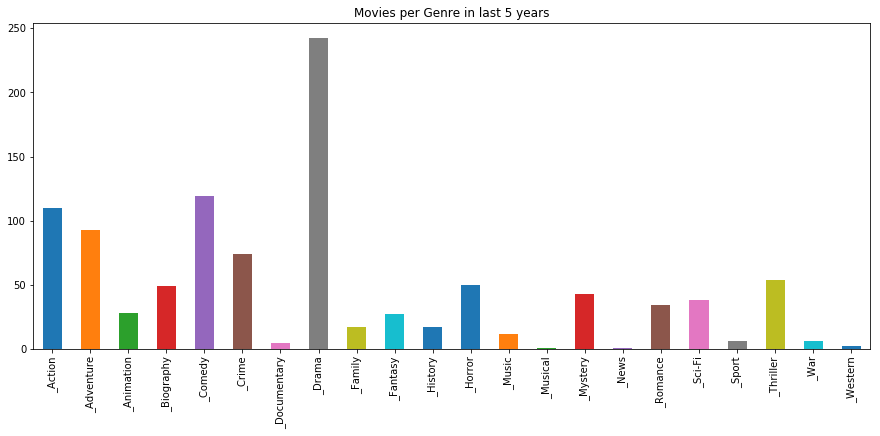

In [42]:
#Plot Genre count to observe which genre has been made the most

a.sum(axis=0,skipna=True).plot.bar(x='genres',y='count',title='Movies per Genre in last 5 years',figsize=(15,6))

## Observation: 
### We observe here that in the past 5 years the DRAMA genre occurs significantly more often than any other genre does.

### -

### We would like to observe how the genre compares to the success of a movie and if there is a link
##### -
#### Perform inner join on our dataframe with the genre count dataframe

In [43]:
merged_inner = pd.merge(left=a, right=dataimdb, left_on='title', right_on='title')
merged_inner.head()

,title,_Action,_Adventure,_Animation,_Biography,_Comedy,_Crime,_Documentary,_Drama,_Family,...,rating,description,director,stars,votes,gross,budget,urls,Budget $(mil),Gross $(mil)
0,10 Cloverfield Lane,0,0,0,0,0,0,0,1,0,...,7.2,"After getting in a car accident, a woman i...",Dan Trachtenberg,"JohnGoodman,MaryElizabethWinstead,JohnGallaghe...",277197,$72.08M,15000000,https://www.imdb.com/title/tt1179933/,15.0,72.08
1,12 Strong,1,0,0,0,0,0,0,1,0,...,6.5,12 Strong tells the story of the first Spe...,Nicolai Fuglsig,"ChrisHemsworth,MichaelShannon,MichaelPeña,Navi...",60000,$45.50M,35000000,https://www.imdb.com/title/tt1413492/,35.0,45.50
2,13 Hours,1,0,0,0,0,0,0,1,0,...,7.3,During an attack on a U.S. compound in Lib...,Michael Bay,"JohnKrasinski,PabloSchreiber,JamesBadgeDale,Da...",111516,$52.85M,50000000,https://www.imdb.com/title/tt4172430/,50.0,52.85
3,13th,0,0,0,0,0,1,1,0,0,...,8.2,An in-depth look at the prison system in t...,Ava DuVernay,"MelinaAbdullah,MichelleAlexander,CoryBooker,Do...",21815,NaN,566,https://www.imdb.com/title/tt5895028/,0.0,NaN
4,1917,0,0,0,0,0,0,0,1,0,...,8.3,"April 6th, 1917. As a regiment assembles t...",Sam Mendes,"Dean-CharlesChapman,GeorgeMacKay,DanielMays,Co...",286988,$159.23M,95000000,https://www.imdb.com/title/tt8579674/,95.0,159.23


In [44]:
#merged_inner.info()

In [45]:
#Compares a certain genre and calculates it's gross sum
merged_inner['total'] = merged_inner.loc[merged_inner['_Adventure'] > 0,['_Adventure','Gross $(mil)']].sum(axis=1)
print(str(merged_inner['total'].sum()))

19854.72


In [46]:
#We proceed to store the genre along with their sum into a dictionary which can be vsualized

from collections import defaultdict
grdict={}
for column in merged_inner.columns[1:23]:   
    a = merged_inner.loc[merged_inner[column] > 0,[column,'Gross $(mil)']].sum(axis=1).sum()
    grdict.update( {column : a} )
print(grdict)

{'_Action': 18078.460000000003, '_Adventure': 19854.719999999998, '_Animation': 4668.969999999999, '_Biography': 1866.82, '_Comedy': 8533.66, '_Crime': 3123.78, '_Documentary': 44.97, '_Drama': 8656.699999999999, '_Family': 2488.2299999999996, '_Fantasy': 3672.3599999999997, '_History': 918.24, '_Horror': 2327.95, '_Music': 726.75, '_Musical': 505.01, '_Mystery': 1475.37, '_News': 1.0, '_Romance': 856.5999999999999, '_Sci-Fi': 8645.08, '_Sport': 354.73, '_Thriller': 3322.25, '_War': 168.55, '_Western': 31.82}


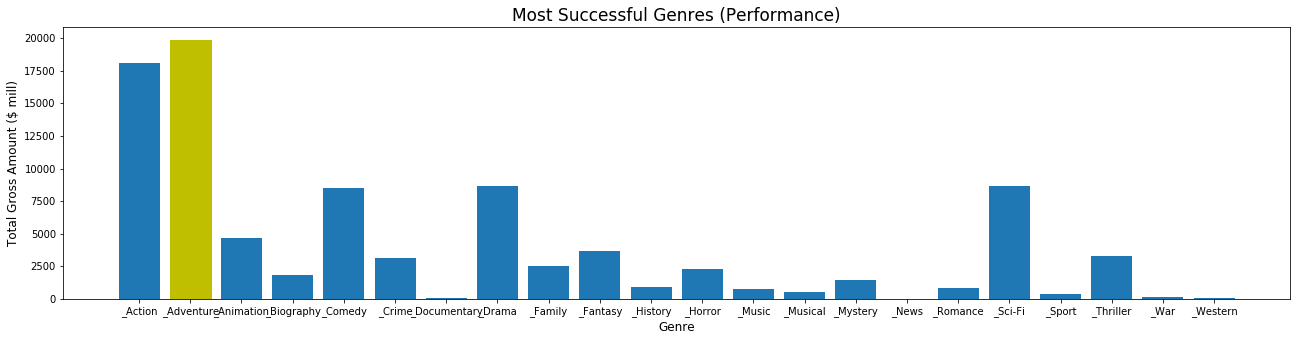

In [57]:
plt.figure(figsize=(22, 5))
plt.title('Most Successful Genres (Performance)',fontsize=17)
plt.xlabel('Genre',fontsize=12)
plt.ylabel('Total Gross Amount ($ mill)',fontsize=12)
a=plt.bar(range(len(grdict)), list(grdict.values()), align='center')
a[1].set_color('y')
plt.xticks(range(len(grdict)), list(grdict.keys()))
plt.show()

## Observation:
### We can conclude that movies with 'Adventure' genre were the most successful in terms of revenue, followed be 'Action'. Despite, the most number of movies being of the genre Drama, it still isn't the most popular genre.

##### Similarly, we can draw a correlation between genre and budget. 

In [53]:
from collections import defaultdict
from matplotlib import pyplot as plt

grdict1={}
for column in merged_inner.columns[1:23]:   
    a = merged_inner.loc[merged_inner[column] > 0,[column,'Budget $(mil)']].sum(axis=1).mean()
    grdict1.update( {column : a} )

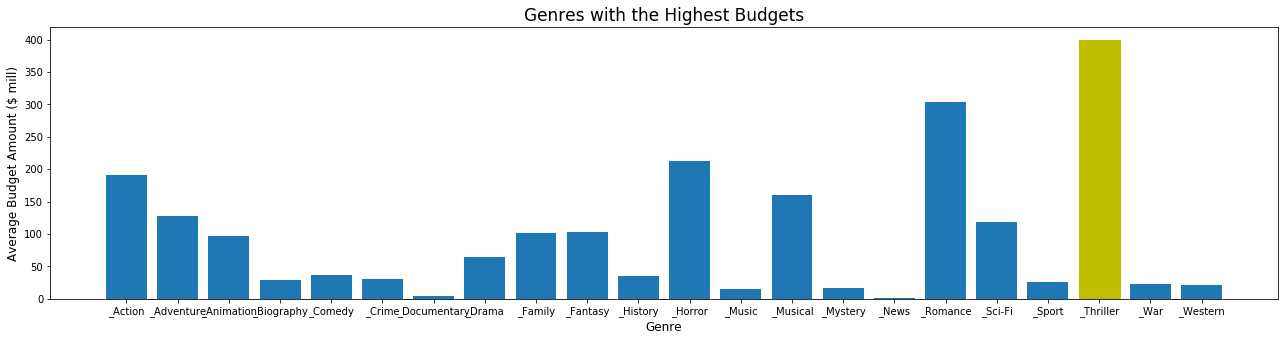

In [54]:
plt.figure(figsize=(22, 5))
plt.title('Genres with the Highest Budgets',fontsize=17)
plt.xlabel('Genre',fontsize=12)
plt.ylabel('Average Budget Amount ($ mill)',fontsize=12)
a=plt.bar(range(len(grdict1)), list(grdict1.values()), align='center')
a[19].set_color('y')
plt.xticks(range(len(grdict1)), list(grdict1.keys()))
plt.show()

## Observation:
### We notice an interesting insight here, Movies which have 'Thriller' as a part of their genre were observed to have higher budgets than other genres. 
#### Note: We have taken the average budget amount per movie in a genre.

In [92]:
cor=dataimdb.corr()

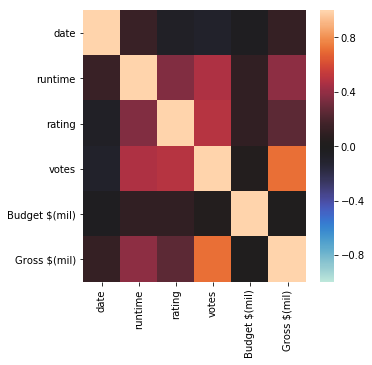

In [91]:
import seaborn as sns
from matplotlib import pyplot as plt


fig, axes = plt.subplots(figsize=(5, 5))
sns.heatmap(cor, vmin=-1, vmax=1, center=0, ax=axes)
plt.show()

## Insight:

### We deduce here that Movie Votes and the Gross Amount made ($M) are positively correlated. I.e Any popular movie that earned a lot will also gain more votes on IMDB. However, we note that Gross Amount is not affected that significantly by how highly rated the movie is.

#### An example would be how 'Justice League' by Zack Snyder earned $650M, and hence got 400,000 votes (+ve corr), but it still wasn't high rated. Rated 6.0 on imdb. Success also depends a lot on marketing, promotional campaigns, and brand/celebrity influence